PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


/nix/store/qjgmb81jx90lj7c6xxrkq8i5h8rgjn7g-python3.12-scikit-learn-1.6.1/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/nix/store/qjgmb81jx90lj7c6xxrkq8i5h8rgjn7g-python3.12-scikit-learn-1.6.1/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/nix/store/qjgmb81jx90lj7c6xxrkq8i5h8rgjn7g-python3.12-scikit-learn-1.6.1/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/nix/store/qjgmb81jx90lj7c6xxrkq8i5h8rgjn7g-python3.1

R2 es igual a: [-0.00909091]
MAE es igual a: [0.24324324]
MSE es igual a: [0.24324324]
El modelo obtuvo 75.67567567567568% de precision para clasificar
El intercepto del modelo es: [3.21032385], y las pendientes son: [[-2.16464225 -0.02875269]]


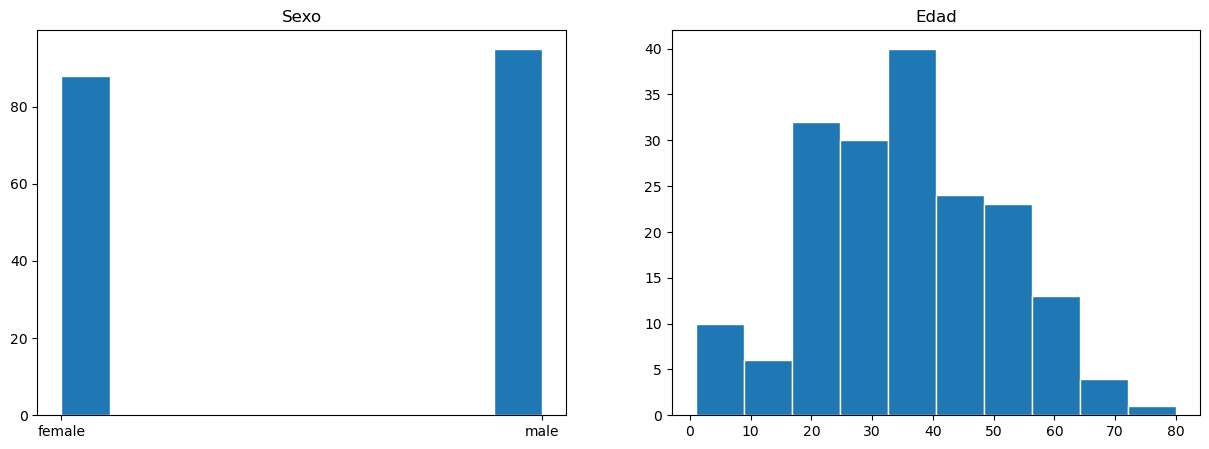

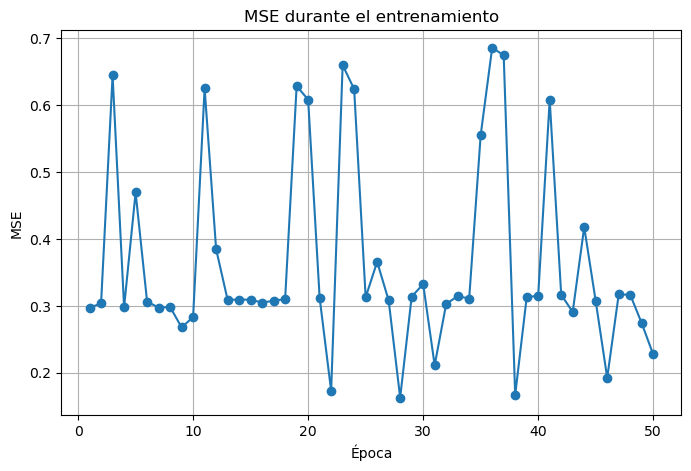

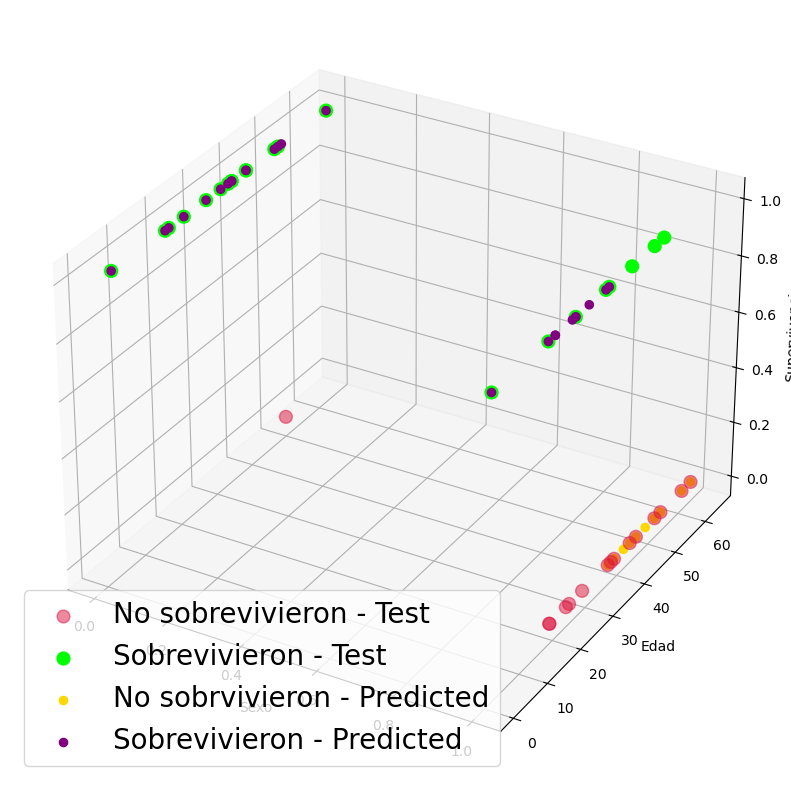

In [6]:
#---PROYECTO 1---
#Angel Ignacio Ortega Vega - 218524155
#Cesar Daniel Gonzalez Giron - 218524988
#Aprendizaje Maquina - D03
#Prof. Robin Fernando Conchas Cedano
#Fecha: 26/03/2025

# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Construir el modelo
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv("datasets/DataTitanic.csv")

# Mostrar el porcentaje de datos invalidos por columna
print((df.isna().sum()/df.shape[0])*100)

# Limpiar los datos
df.dropna(inplace=True)

# Seleccionar las variables independientes y dependientes
variablex = df[['Sex','Age']].values.reshape((-1,2))
variabley = df[['Survived']].values.reshape((-1,1))

# Histogramas de las variables independientes
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].hist(variablex[:,0], edgecolor = "white")
ax[0].set_title("Sexo")
ax[1].hist(variablex[:,1], edgecolor = "white")
ax[1].set_title("Edad")

# Convertir 'male' y 'female' a 1 y 0, respectivamente
variablex[:,0] = np.where(variablex[:,0] == 'male', 1, 0)

# Crear y entrenar el modelo
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(variablex, variabley, test_size=0.2, random_state=12)
model.fit(x_train, y_train)

# Inicializamos modelo de regresión logística con descenso de gradiente
modelo = SGDClassifier(loss='log_loss', learning_rate='constant', eta0=0.01, max_iter=1, warm_start=True)

mse_values = []

# Entrenamos por varias iteraciones manualmente
for epoch in range(1, 51):
    modelo.fit(x_train, y_train)
    probs = modelo.predict_proba(x_train)[:, 1]  # Probabilidades de clase 1
    mse = mean_squared_error(y_train, probs)
    mse_values.append(mse)

# Crear figura y ejes con subplots (por ejemplo, 1 fila, 1 columna)
fig, ax2 = plt.subplots(figsize=(8, 5))  # Puedes ajustar tamaño

# Graficamos el MSE en el eje 'ax2'
ax2.plot(range(1, 51), mse_values, marker='o')
ax2.set_xlabel("Época")
ax2.set_ylabel("MSE")
ax2.set_title("MSE durante el entrenamiento")
ax2.grid(True)

# Predecir los valores de y usando el modelo entrenado
y_pred = model.predict(x_test)

# Calcular el coeficiente de determinacion
ssres = 0
sstot = 0
for i in range(len(y_test)):
  ssres += (y_test[i] - y_pred[i])**2
  sstot += (y_test[i] - np.mean(y_test))**2
r2 = 1 - (ssres / sstot)
print(f"R2 es igual a: {r2}")

# Calcular el error medio absoluto
mae = 0
for i in range(len(y_test)):
  mae += abs(y_test[i] - y_pred[i])
mae = mae / len(y_test)
print(f"MAE es igual a: {mae}")

# Calcular el error cuadratico medio
mse = 0
for i in range(len(y_test)):
  mse += (y_test[i] - y_pred[i])**2
mse = mse / len(y_test)
print(f"MSE es igual a: {mse}")

# Calcular porcentaje de precision
porcent = model.score(x_test,y_test)
print(f"El modelo obtuvo {porcent*100}% de precision para clasificar")

print(f"El intercepto del modelo es: {model.intercept_}, y las pendientes son: {model.coef_}")

# Graficar las predicciones
fig = plt.figure()
plt.rcParams['figure.figsize'] = (10,10)
ax = fig.add_subplot(111, projection='3d')
# Print class 0 of y test  #
ax.scatter(x_test[np.where(y_test == 0)[0],0], x_test[np.where(y_test == 0)[0],1], 0, s=85, c='crimson', alpha=0.5, label = "No sobrevivieron - Test")
# Print class 1 of y test #
ax.scatter(x_test[np.where(y_test == 1)[0],0], x_test[np.where(y_test == 1)[0],1], 1, s=85, c='lime', alpha=1, label = "Sobrevivieron - Test")
# Print class 0 of y predicted  #
ax.scatter(x_test[np.where(y_pred == 0)[0],0], x_test[np.where(y_pred == 0)[0],1], 0, s=35, c='gold', alpha=1, label = "No sobrvivieron - Predicted")
# Print class 1 of y predictet #
ax.scatter(x_test[np.where(y_pred == 1)[0],0], x_test[np.where(y_pred == 1)[0],1], 1, s=35, c='purple', alpha=1, label = "Sobrevivieron - Predicted")
ax.set_xlabel("Sexo")
ax.set_ylabel("Edad")
ax.set_zlabel("Supervivencia")
plt.legend(fontsize=20, loc="lower left")